# Model implementation
Implement a bunch of models

## Librerias

In [21]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Procesamiento de datos

In [12]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [15]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
data = titanic.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1).copy()

## Transformacion de variables

In [99]:
data['Embarked'] = data['Embarked'].replace(np.nan, data['Embarked'].mode()[0])

In [100]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.rename({'Sex_male': 'Sex'}, axis=1, inplace=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1
887,1,1,19.0,0,0,30.0000,S,0
888,0,3,NaN,1,2,23.4500,S,0
889,1,1,26.0,0,0,30.0000,C,1


In [101]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=False)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


## Correlación 

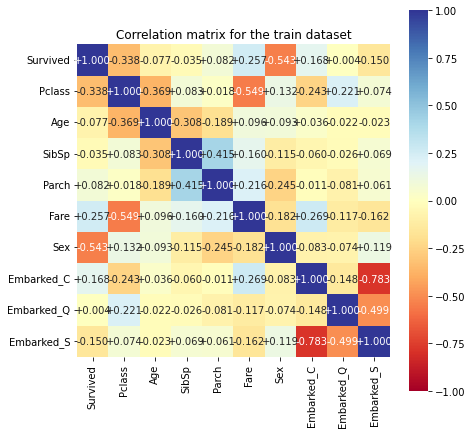

In [102]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the train dataset")
plt.show()

## Datos faltantes

### k-NN

In [103]:
no_age = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']
predictors_set = [no_age]
objectives = ['Age']
data_knn = data.copy()
data_knn['Age'] = data_knn['Age'].fillna(0)
data_knn

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,0.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [104]:
k = 5
for predictors, objective in zip(predictors_set, objectives):
    X = data_knn[data_knn[predictors].isin([0]).any(axis=1).apply(lambda x: not x)]
    y = X[objective]
    X = X.drop(columns=objective)
    kNN_model = KNeighborsRegressor(n_neighbors=k).fit(X,y)
    X_hat = data_knn[data_knn[objective] == 0].drop(columns=objective)
    data_knn.loc[data_knn[objective] == 0, objective] = kNN_model.predict(X_hat)
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex         891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


### Imputed Data

## Sets de entrenamiento y pueba

In [139]:
X = data_knn
y = X['Survived']
X = X.drop(columns='Survived')

In [106]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementando los modelos

In [141]:
tree_model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [142]:
random_model = RandomForestClassifier().fit(X_train, y_train)
y_pred_rand = random_model.predict(X_test)

In [143]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='error').fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [115]:
svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [116]:
logistic_model = LogisticRegression().fit(X_train, y_train)
y_pred_log = logistic_model.predict(X_test)

## Evaluación

In [117]:
def concat_test_pred(y_test, y_pred):
    
    df_test = y_test.to_frame(name='Survived').reset_index().drop(columns='index')
    df_pred = pd.Series(y_pred).to_frame(name='Prediction')
    results = pd.concat([df_test, df_pred], axis=1)
    
    return results

In [118]:
def performance_metrics(results):
    
    positives = results[['Survived', 'Prediction']][results['Survived'] == 1]
    negatives = results[['Survived', 'Prediction']][results['Survived'] == 0]
    
    true_negatives = negatives[negatives['Survived'] == negatives['Prediction']].shape[0]
    false_positives = negatives[negatives['Survived'] != negatives['Prediction']].shape[0]
    true_positives = positives[positives['Survived'] == positives['Prediction']].shape[0]
    false_negatives = positives[positives['Survived'] != positives['Prediction']].shape[0]
    
    confusion_matrix = {'actual positives' : [true_positives, false_negatives], 
                        'actual negatives' : [false_positives, true_negatives]}
    
    confusion_matrix_df = pd.DataFrame.from_dict(confusion_matrix, orient='index', 
                                                 columns=['predicted positives', 'predicted negatives'])
    
    accuracy = (true_positives + true_negatives) / (true_positives + false_positives +  true_negatives + false_negatives)
    precission = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precission * recall) / (precission + recall)
    
    metrics = {'Accuracy' : accuracy, 'Precission' : precission, 'Recall' : recall, 'F1 Score' : f1_score}
    
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Metrics'])
    
    return confusion_matrix_df, metrics_df  

In [125]:
results = concat_test_pred(y_test, y_pred_tree)
confusion_matrix, metrics = performance_metrics(results)
confusion_matrix

,predicted positives,predicted negatives
actual positives,57,17
actual negatives,21,84


In [126]:
metrics

,Metrics
Accuracy,0.787709
Precission,0.730769
Recall,0.770270
F1 Score,0.750000


In [127]:
results = concat_test_pred(y_test, y_pred_svm)
confusion_matrix, metrics = performance_metrics(results)
confusion_matrix

,predicted positives,predicted negatives
actual positives,52,22
actual negatives,10,95


In [128]:
metrics

,Metrics
Accuracy,0.821229
Precission,0.838710
Recall,0.702703
F1 Score,0.764706


In [147]:
results = concat_test_pred(y_test, y_pred_rand)
confusion_matrix, metrics = performance_metrics(results)
confusion_matrix

,predicted positives,predicted negatives
actual positives,59,15
actual negatives,15,90


In [149]:
metrics

,Metrics
Accuracy,0.832402
Precission,0.797297
Recall,0.797297
F1 Score,0.797297


In [131]:
results = concat_test_pred(y_test, y_pred_log)
confusion_matrix, metrics = performance_metrics(results)
confusion_matrix

,predicted positives,predicted negatives
actual positives,53,21
actual negatives,16,89


In [132]:
metrics

,Metrics
Accuracy,0.793296
Precission,0.768116
Recall,0.716216
F1 Score,0.741259


In [133]:
results = concat_test_pred(y_test, y_pred_xgb)
confusion_matrix, metrics = performance_metrics(results)
confusion_matrix

,predicted positives,predicted negatives
actual positives,61,13
actual negatives,19,86


In [134]:
metrics

,Metrics
Accuracy,0.821229
Precission,0.762500
Recall,0.824324
F1 Score,0.792208


In [135]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [144]:
mse_test=mean_squared_error(y_pred_xgb,y_test)
mae_test=mean_absolute_error(y_pred_xgb,y_test)
r2_test=r2_score(y_pred_xgb,y_test)
print("el modelo tiene las siguientes métricas en test:")
print("MSE=", mse_test)
print("MAE=", mae_test)
print("R2=" ,r2_test)

el modelo tiene las siguientes métricas en test:
MSE= 0.1787709497206704
MAE= 0.1787709497206704
R2= 0.27676767676767666


In [145]:
mse_test=mean_squared_error(y_pred_tree,y_test)
mae_test=mean_absolute_error(y_pred_tree,y_test)
r2_test=r2_score(y_pred_tree,y_test)
print("el modelo tiene las siguientes métricas en test:")
print("MSE=", mse_test)
print("MAE=", mae_test)
print("R2=" ,r2_test)

el modelo tiene las siguientes métricas en test:
MSE= 0.18994413407821228
MAE= 0.18994413407821228
R2= 0.2225344915687275


In [146]:
mse_test=mean_squared_error(y_pred_rand,y_test)
mae_test=mean_absolute_error(y_pred_rand,y_test)
r2_test=r2_score(y_pred_rand,y_test)
print("el modelo tiene las siguientes métricas en test:")
print("MSE=", mse_test)
print("MAE=", mae_test)
print("R2=" ,r2_test)

el modelo tiene las siguientes métricas en test:
MSE= 0.16759776536312848
MAE= 0.16759776536312848
R2= 0.30888030888030893
